In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import scipy as sc

**Aproximar** la función:

$Y = cos(1.5\pi X)$ - - - - - - - - - - - - - - - - ${}_{ecuación} {}_{1}$

utilizando una **regresión lineal** y con solo 30 observaciones de esta función

**Pregunta 1:** ¿Cuales son las principales complicaciones de este planteamiento?

Como el nombre del modelo lo indica, trataremos de encontrar una función linea, esto es que la relación de las variables sea lineal. Sabemos que f(x)=cos(x) no cumple con la propiedad de homogeneidad para la linealidad del modelo

Generemos 30 datos a partir de la función planteada en la ecuación 1

Adicionalmente para complicarle un poco el trabajo al modelo agreguemos un poco de ruido

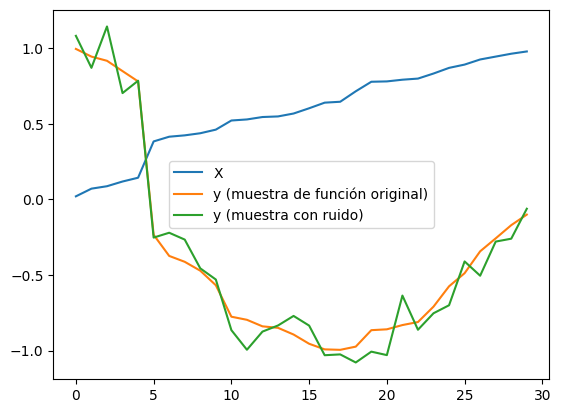

In [3]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y_sin_ruido = true_fun(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, label='X')
plt.plot(y_sin_ruido, label='y (muestra de función original)')
plt.plot(y, label='y (muestra con ruido)')
plt.legend();

Recordando el planteamiento de la regresión lineal, intentaremos estimar $y$ a partir de $X$, es decir: $\hat{y}=\theta^TX$

Sin embargo la respuesta de la pregunta 1 nos lleva a la conclusión de que no es posible estimar $y$ a partir de $x$ con una regresión lineal.

Pero en el análisis de datos existen algunos artilugios matemáticos para solucionar este tipo de problemas.

Lo que haremos es cambiar el planteamiento.
Además de usar $X$ usaremos algunas transformaciones no lineales de $X$ y las usaremos como features adicionales.

Por ejemplo: $X^2$, $X^3$, $X^4$, $...$, $X^n$ (transformaciones polinomiales)

Los ejemplos anteriores son transformaciones polinomiales de grado 2, 3, 4, ..., n

Y esto nos lleva a...

**Pregunta 2**: ¿Cuántos grados son necesarios?

De a cuerdo a la gráfica, podemos observar qu elos datos tiene forma de parábola, por lo que los grados necesarios serían de 2

A continuación te mostramos una manera de usar [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para explorar hiperparámetros.

Los pipelines son muy útiles al momento de explorar hiperparámetros (en este caso el hiperparámetro que estamos explorando es el máximo grado de libertad en la transformación de la variable $X$ necesario para estimar $y$)

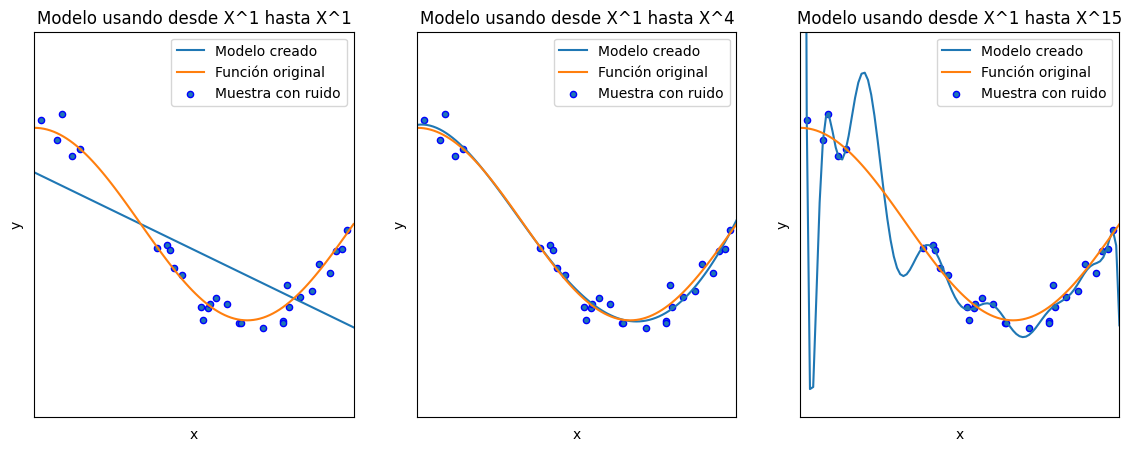

In [7]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
    plt.plot(X_test, true_fun(X_test), label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.show()

## Reto sobre *end-to-end machine learning model*

**Paso 2: Consigue los datos e importalos en un data frame llamado df**

In [7]:
df = pd.read_csv('insurance.csv')

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**NOTA:** DE AQUÍ EN ADELANTE (EN CADA PASO) DEBERÁS INCLUIR UN PEDAZO DE CÓDIGO PARA SEPARAR TU DATASET EN ENTRENAMIENTO Y PRUEBA. EL SCORE CALCULADO DEBERÁ SER DEL SET DE PRUEBA

**Paso 3:** Selecciona algunos features al azar y crea una regresión lineal, luego calcula el score para conocer el performance del modelo

In [11]:
target = df["charges"]
ls_features = df[['age','bmi','children']]

#target
ls_features



,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [12]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(ls_features,target, test_size=0.3, random_state=0)
X_train, X_test, Y_train, Y_test

(      age     bmi  children
 1163   18  28.215         0
 196    39  32.800         0
 438    52  46.750         5
 183    44  26.410         0
 1298   33  27.455         2
 ...   ...     ...       ...
 763    27  26.030         0
 835    42  35.970         2
 1216   40  25.080         0
 559    19  35.530         0
 684    33  18.500         1
 
 [936 rows x 3 columns],
       age     bmi  children
 578    52  30.200         1
 610    47  29.370         1
 569    48  40.565         2
 1034   61  38.380         0
 198    51  18.050         0
 ...   ...     ...       ...
 1261   28  37.100         1
 494    21  25.700         4
 97     55  38.280         0
 418    64  39.160         1
 920    62  25.000         0
 
 [402 rows x 3 columns],
 1163     2200.83085
 196      5649.71500
 438     12592.53450
 183      7419.47790
 1298     5261.46945
            ...     
 763      3070.80870
 835      7160.33030
 1216     5415.66120
 559      1646.42970
 684      4766.02200
 Name: charges, Len

In [14]:
reg = LinearRegression().fit(X_train, Y_train)

score_1 = reg.score(X_train, Y_train)
print('score_1:',score_1)

score_1: 0.10360358728367625


**PASO 4**

Realiza un análisis exploratorio, luego realiza el trabajo que ya conoces de limpieza, imputación de valores en los vacíos, eliminación de outliers, etc. Finalmente elije las mismas variables que usaste en el paso 3 (ya limpias) y vuelve a crear un modelo de regresión lineal calculando su score.

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


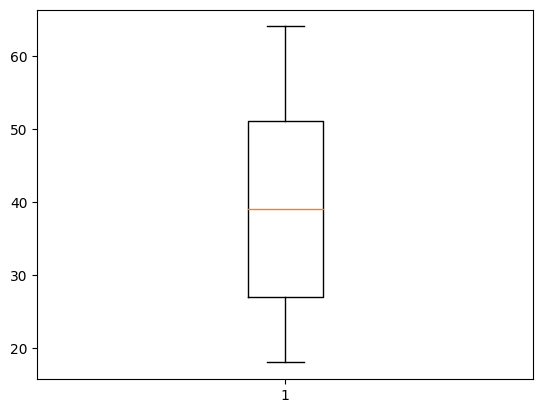

In [16]:
# Creating plot
plt.boxplot(df["age"])
 
# show plot
plt.show()

No se encuentran outliers en la variable "age".

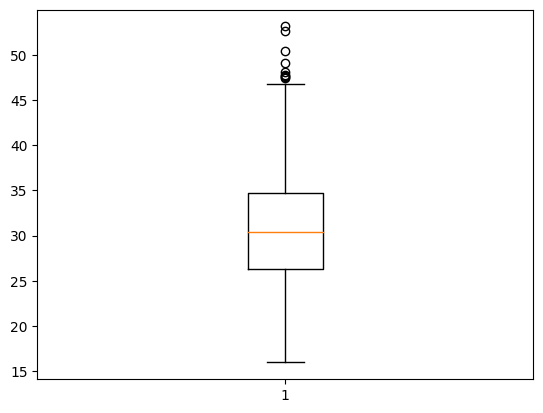

In [17]:
# Creating plot
plt.boxplot(df["bmi"])
 
# show plot
plt.show()

Si encontramos outliers en la variable "bmi". Procedemos a leminar los valores arriba de 47

In [18]:
df1 = df[(df['bmi'] < 47)]
print (df1)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]


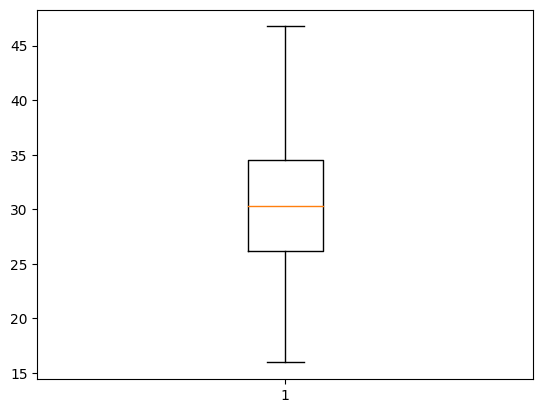

In [19]:
# Creating plot
plt.boxplot(df1["bmi"])
 
# show plot
plt.show()

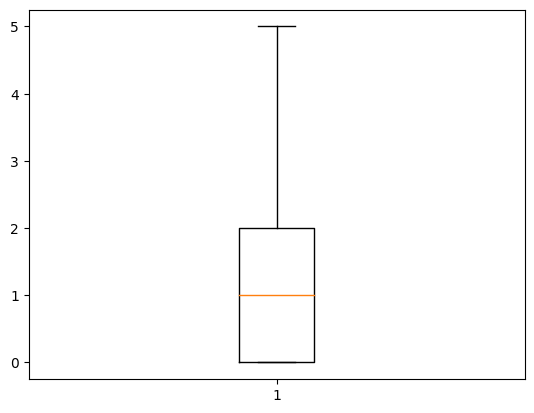

In [20]:
# Creating plot
plt.boxplot(df["children"])
 
# show plot
plt.show()

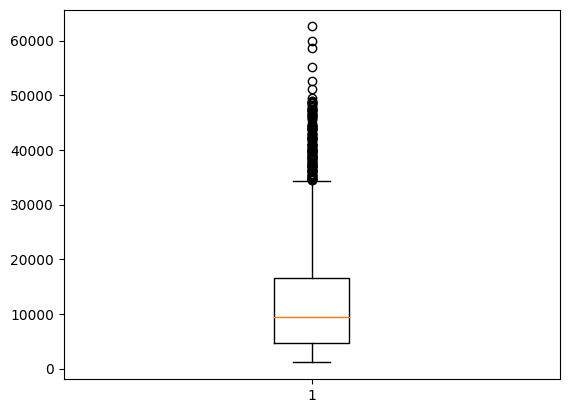

In [23]:
# Creating plot
plt.boxplot(df1["charges"])
 
# show plot
plt.show()

Encontramos outliers en la variable "charges". Procedemos a eliminar los valores arriba de 36000

In [27]:
df2 = df1[(df1['charges'] < 36000)]
print (df2)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1205 rows x 7 columns]


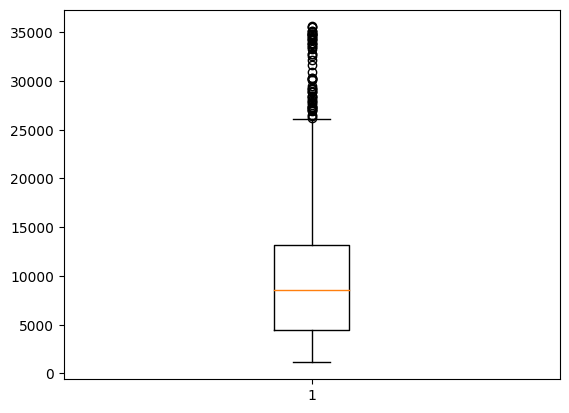

In [28]:
# Creating plot
plt.boxplot(df2["charges"])
 
# show plot
plt.show()

Aun hay outliers. Procedemos a eliminarlos

In [29]:
df3 = df2[(df2['charges'] < 26000)]
print (df3)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1139 rows x 7 columns]


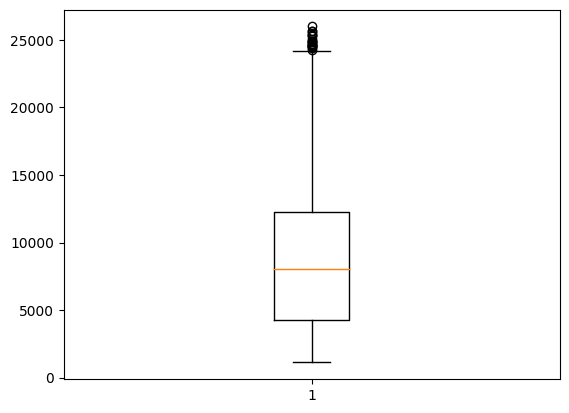

In [30]:
# Creating plot
plt.boxplot(df3["charges"])
 
# show plot
plt.show()

In [32]:
# Escribe aquí tu código

target1 = df3["charges"]
ls_features1 = df3[['age','bmi','children']]

#target
ls_features1

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1332,52,44.700,3
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0


In [33]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(ls_features1,target1, test_size=0.3, random_state=0)
X_train1, X_test1, Y_train1, Y_test1

(      age     bmi  children
 779    53  28.880         0
 1056   48  28.900         0
 162    54  39.600         1
 303    28  33.000         2
 393    49  31.350         1
 ...   ...     ...       ...
 1211   39  34.100         2
 896    43  20.045         2
 979    36  29.920         0
 654    59  35.200         0
 799    33  24.795         0
 
 [797 rows x 3 columns],
       age     bmi  children
 786    60  36.955         0
 1027   23  18.715         0
 1141   41  32.600         3
 218    26  29.920         1
 1336   21  25.800         0
 ...   ...     ...       ...
 306    28  27.500         2
 1245   28  24.300         5
 1266   55  30.500         0
 590    58  29.000         0
 176    38  27.835         2
 
 [342 rows x 3 columns],
 779      9869.81020
 1056     8277.52300
 162     10450.55200
 303      4349.46200
 393      9290.13950
            ...     
 1211    23563.01618
 896     19798.05455
 979      4889.03680
 654     12244.53100
 799     17904.52705
 Name: charges, Len

In [36]:


X1 = X_train1
y1 = Y_train1
reg = LinearRegression().fit(X1, y1)



In [37]:
score_2 = reg.score(X1, y1)
print('score_2:',score_2)

score_2: 0.301510165668883


***PASO 5***

Crea nuevas variables y transforma las ya existentes si es necesario y selecciona las variables mas reelevantes con alguna técnica de selección de variables. Luego crea nuevamente un modelo de regresión lineal calculando su score.

**Procedemos a convertir las variables categóricas en numéricas***

In [38]:
sex_ = {'male':1, 'female':0}
smoker_ = {'yes':1, 'no':0}

In [39]:
df3['sex'] = df3['sex'].map(sex_)
df3

C:\Users\tavok\AppData\Local\Temp\ipykernel_20124\2045497127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sex'] = df3['sex'].map(sex_)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,no,southwest,11411.68500
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350


In [43]:
df3['smoker'] = df3['smoker'].map(smoker_)
df3

C:\Users\tavok\AppData\Local\Temp\ipykernel_20124\279644685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['smoker'] = df3['smoker'].map(smoker_)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,southwest,11411.68500
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350


In [44]:
# Escribe aquí tu código

target2 = df3["charges"]
ls_features2 = df3[['age','bmi','children','sex','smoker']]

#target
ls_features2

,age,bmi,children,sex,smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1332,52,44.700,3,0,0
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0


In [45]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(ls_features2,target2, test_size=0.3, random_state=0)
X_train2, X_test2, Y_train2, Y_test2

(      age     bmi  children  sex  smoker
 779    53  28.880         0    1       0
 1056   48  28.900         0    0       0
 162    54  39.600         1    1       0
 303    28  33.000         2    0       0
 393    49  31.350         1    1       0
 ...   ...     ...       ...  ...     ...
 1211   39  34.100         2    1       0
 896    43  20.045         2    0       1
 979    36  29.920         0    0       0
 654    59  35.200         0    0       0
 799    33  24.795         0    1       1
 
 [797 rows x 5 columns],
       age     bmi  children  sex  smoker
 786    60  36.955         0    1       0
 1027   23  18.715         0    1       0
 1141   41  32.600         3    0       0
 218    26  29.920         1    0       0
 1336   21  25.800         0    0       0
 ...   ...     ...       ...  ...     ...
 306    28  27.500         2    0       0
 1245   28  24.300         5    1       0
 1266   55  30.500         0    0       0
 590    58  29.000         0    0       0
 176   

In [46]:
X2 = X_train2
y2 = Y_train2
reg = LinearRegression().fit(X2, y2)



In [47]:
score_3 = reg.score(X2, y2)
print('score_3:',score_3)

score_3: 0.6920905431382272


    Este modelo explica mejor.

Agregamos más variables:

In [49]:
regiones = pd.get_dummies(df3['region'])
regiones

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1332,0,0,0,1
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0


In [50]:
df4 = pd.concat([df3,regiones], axis=1)
df4

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,southwest,11411.68500,0,0,0,1
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0


In [51]:
df4 = df4.drop(['region'], axis=1)
df4

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500,0,0,0,1
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0


In [53]:
target3 = df4["charges"]
ls_features3 = df4.drop(['charges'],axis=1)

#target
ls_features3

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,0,0,0,1
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0


In [54]:
target3

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1139, dtype: float64

In [55]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(ls_features3,target3, test_size=0.3, random_state=0)
X_train3, X_test3, Y_train3, Y_test3

(      age  sex     bmi  children  smoker  northeast  northwest  southeast  \
 779    53    1  28.880         0       0          0          1          0   
 1056   48    0  28.900         0       0          0          0          0   
 162    54    1  39.600         1       0          0          0          0   
 303    28    0  33.000         2       0          0          0          1   
 393    49    1  31.350         1       0          1          0          0   
 ...   ...  ...     ...       ...     ...        ...        ...        ...   
 1211   39    1  34.100         2       0          0          0          1   
 896    43    0  20.045         2       1          1          0          0   
 979    36    0  29.920         0       0          0          0          1   
 654    59    0  35.200         0       0          0          0          1   
 799    33    1  24.795         0       1          1          0          0   
 
       southwest  
 779           0  
 1056          1  
 162 

In [56]:
X3 = X_train3
y3 = Y_train3
reg = LinearRegression().fit(X3, y3)



In [58]:
score_4 = reg.score(X3, y3)
print('score_4:',score_4)

score_4: 0.6950606301663167


In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1139 non-null   int64  
 1   sex        1139 non-null   int64  
 2   bmi        1139 non-null   float64
 3   children   1139 non-null   int64  
 4   smoker     1139 non-null   int64  
 5   charges    1139 non-null   float64
 6   northeast  1139 non-null   uint8  
 7   northwest  1139 non-null   uint8  
 8   southeast  1139 non-null   uint8  
 9   southwest  1139 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 66.7 KB


In [64]:
df4

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500,0,0,0,1
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0


In [ ]:
***PASO 6***

Realiza un procedimiento de escalamiento en tus variables. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [74]:
df4_num = df4.columns

In [81]:
escalado_transform = ColumnTransformer([('escaladas',MinMaxScaler(feature_range=(0,1)),df4_num)])
escalado_transform

ColumnTransformer(transformers=[('escaladas', MinMaxScaler(),
                                 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object'))])

In [82]:
df4_escalado = escalado_transform.fit_transform(df4)
df4_escalado

array([[0.02173913, 0.        , 0.38778824, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.57843456, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 1.        , 0.55342644, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.51835011, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.67846703, ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.        , 0.31958428, ..., 0.        , 0.        ,
        1.        ]])

In [84]:
df_escalado = pd.DataFrame(df4_escalado)
df_escalado

,0,1,2,3,4,5,6,7,8,9
0,0.021739,0.0,0.387788,0.0,1.0,0.633794,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.024272,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.133794,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.838834,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.110369,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1134,0.739130,0.0,0.933420,0.6,0.0,0.413728,0.0,0.0,0.0,1.0
1135,0.695652,1.0,0.487496,0.6,0.0,0.381114,0.0,1.0,0.0,0.0
1136,0.000000,0.0,0.518350,0.0,0.0,0.043589,1.0,0.0,0.0,0.0
1137,0.000000,0.0,0.678467,0.0,0.0,0.020424,0.0,0.0,1.0,0.0


In [86]:
df_escalado.columns = list(df4.columns.values)
df_escalado

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,0.0,0.387788,0.0,1.0,0.633794,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.024272,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.133794,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.838834,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.110369,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1134,0.739130,0.0,0.933420,0.6,0.0,0.413728,0.0,0.0,0.0,1.0
1135,0.695652,1.0,0.487496,0.6,0.0,0.381114,0.0,1.0,0.0,0.0
1136,0.000000,0.0,0.518350,0.0,0.0,0.043589,1.0,0.0,0.0,0.0
1137,0.000000,0.0,0.678467,0.0,0.0,0.020424,0.0,0.0,1.0,0.0


In [92]:
target4 = df_escalado["charges"]
ls_features4 = df_escalado.drop(['charges'],axis=1)

#target
ls_features4
target4

0       0.633794
1       0.024272
2       0.133794
3       0.838834
4       0.110369
          ...   
1134    0.413728
1135    0.381114
1136    0.043589
1137    0.020424
1138    0.035627
Name: charges, Length: 1139, dtype: float64

In [93]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(ls_features4,target4, test_size=0.3, random_state=0)
X_train4, X_test4, Y_train4, Y_test4

(           age  sex       bmi  children  smoker  northeast  northwest  \
 664   0.760870  1.0  0.419617       0.0     0.0        0.0        1.0   
 900   0.652174  0.0  0.420266       0.0     0.0        0.0        0.0   
 131   0.782609  1.0  0.767782       0.2     0.0        0.0        0.0   
 252   0.217391  0.0  0.553426       0.4     0.0        0.0        0.0   
 330   0.673913  1.0  0.499838       0.2     0.0        1.0        0.0   
 ...        ...  ...       ...       ...     ...        ...        ...   
 1033  0.456522  1.0  0.589152       0.4     0.0        0.0        0.0   
 763   0.543478  0.0  0.132673       0.4     1.0        1.0        0.0   
 835   0.391304  0.0  0.453394       0.0     0.0        0.0        0.0   
 559   0.891304  0.0  0.624878       0.0     0.0        0.0        0.0   
 684   0.326087  1.0  0.286944       0.0     1.0        1.0        0.0   
 
       southeast  southwest  
 664         0.0        0.0  
 900         0.0        1.0  
 131         0.0    

In [94]:
X4 = X_train4
y4 = Y_train4
reg = LinearRegression().fit(X4, y4)


In [95]:
score_5 = reg.score(X4, y4)
print('score_5:',score_5)

score_5: 0.6950559362266402
